### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
import matplotlib.ticker as tck


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Preço
Ano_Trimestre,
2020T1,94283.75
2020T2,131115.97
2020T3,115109.13
2020T4,100620.67
2021T1,123312.88


In [ ]:
#Concatenando as lojas
lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Convertendo a coluna 'Data' para o tipo datetime
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'], dayfirst=True, errors='coerce')

# Exibindo as primeiras linhas do DataFrame
lojas.head()


,0,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,94283.75,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,131115.97,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115109.13,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100620.67,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,123312.88,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#1. Análise do faturamento


In [ ]:
#Somando o faturamento total de cada loja
faturamentos = [
    loja1['Preço'].sum(),
    loja2['Preço'].sum(),
    loja3['Preço'].sum(),
    loja4['Preço'].sum()]

#Criando Váriaveis anual
lojas = [loja1, loja2, loja3, loja4]
faturamentoanual = []

#Demonstrando a soma de cada loja anualmente
for i in lojas:
  i['Data da Compra'] = pd.to_datetime(i['Data da Compra'], dayfirst=True)
  i['Ano da Compra'] = i['Data da Compra'].dt.year
  faturamentoanual.append(i.groupby('Ano da Compra')['Preço'].sum())

#Criando uma Váriavel trimestre
faturamento_trimestral = []

#Soma de cada loja trimestralmente
for i in lojas:
    i['Ano_Trimestre'] = i['Data da Compra'].dt.to_period('Q').astype(str)
    i['Ano_Trimestre'] = i['Ano_Trimestre'].apply(lambda x:x.replace('Q', 'T'))
    faturamento_trimestral.append(i.groupby('Ano_Trimestre')['Preço'].sum())

#Apresentação do resultado
for i in range(len(faturamentos)):
  print(f'O faturamento total da Loja {i+1} é de R$ {faturamentos[i]:,.2f}')

O faturamento total da Loja 1 é de R$ 1,534,509.12
O faturamento total da Loja 2 é de R$ 1,488,459.06
O faturamento total da Loja 3 é de R$ 1,464,025.03
O faturamento total da Loja 4 é de R$ 1,384,497.58


In [ ]:
#Váriaveis para apresentação gráfica
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
anos = list(faturamentoanual[0].index)
valores_por_loja = [list(faturamento.values) for faturamento in faturamentoanual]
trimestres_todos = sorted(set().union(*[loja.index for loja in faturamento_trimestral]))
valores_por_loja = [list(faturamento.values) for faturamento in faturamento_trimestral]

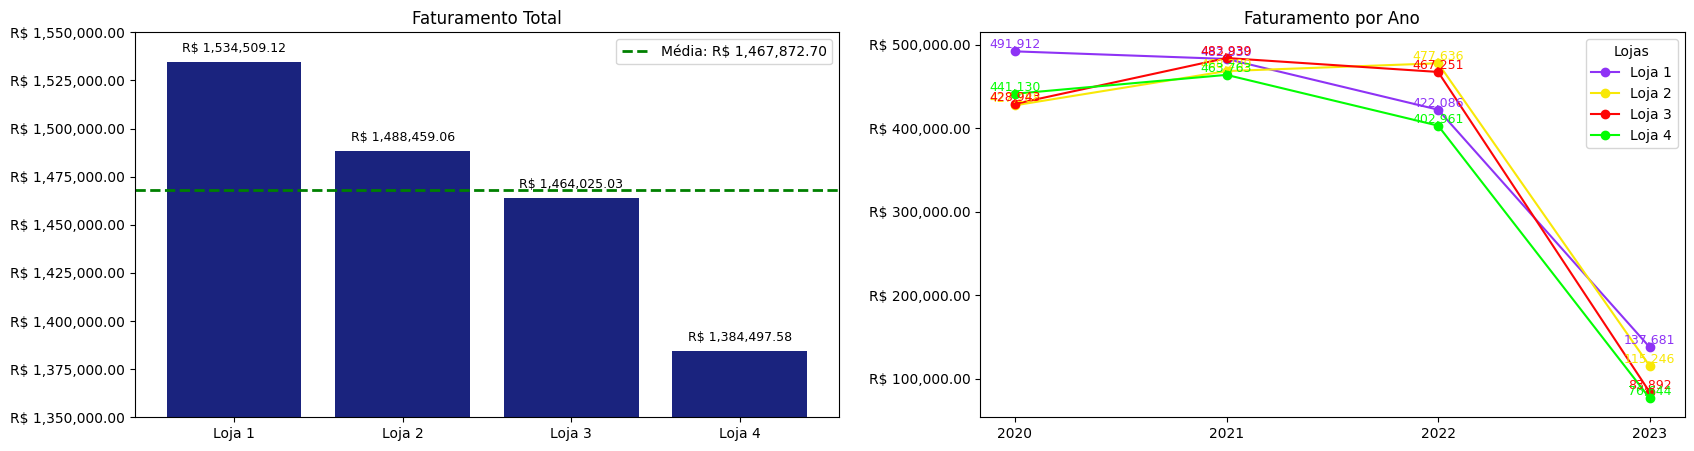

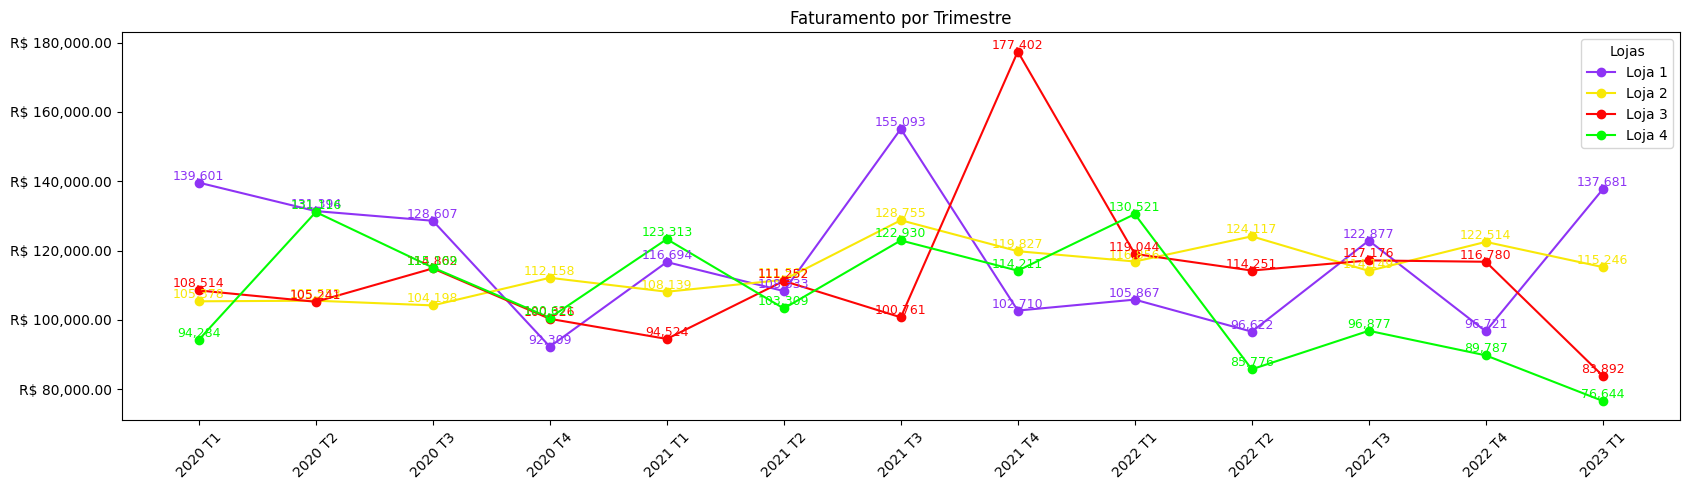

In [ ]:
#Váriaveis para apresentação gráfica
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
anos = list(faturamentoanual[0].index)
valores_por_loja = [list(faturamento.values) for faturamento in faturamentoanual]
trimestres_todos = sorted(set().union(*[loja.index for loja in faturamento_trimestral]))
valores_por_loja = [list(faturamento.values) for faturamento in faturamento_trimestral]

#Definição de cores e tamanhos dos gráficos
cores_linhas = ["#8E33F5", "#F8E807", "#FD0505", "#03FD03"]
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
fig, ay = plt.subplots(figsize=(17, 5))

#Gráfico de barras - Faturamento Total
bars = ax[0].bar(lojas, faturamentos, color='#1A237E')
ax[0].set_title('Faturamento Total')
ax[0].yaxis.set_major_formatter(tck.StrMethodFormatter('R$ {x:,.2f}'))
ax[0].set_ylim(1350000, 1550000)

media_faturamento = sum(faturamentos) / len(faturamentos)
ax[0].axhline(media_faturamento, color='green', linestyle='--', linewidth=2, label=f'Média: R$ {media_faturamento:,.2f}')
ax[0].legend()

for bar in bars:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height + 3500, f'R$ {height:,.2f}', ha='center', va='bottom', color='black', fontsize=9)

#Gráfico de linhas - Anual
for i, loja in enumerate(faturamentoanual):
  anos = loja.index
  valores = loja.values
  ax[1].plot(anos, valores, marker='o', label=f'Loja {i + 1}', color = cores_linhas[i])
  for ano, valor in zip(anos, valores):
    ax[1].text(ano, valor, f'{valor:,.0f}', color = cores_linhas[i], ha='center', va='bottom', fontsize=9)

anos_todos = sorted(set().union(*[loja.index for loja in faturamentoanual]))
ax[1].margins(0.055)
ax[1].set_xticks(anos_todos)
ax[1].set_xticklabels(anos_todos)
ax[1].set_title('Faturamento por Ano')
ax[1].legend(title='Lojas')
ax[1].yaxis.set_major_formatter(tck.StrMethodFormatter('R$ {x:,.2f}'))

#Gráfico de linhas - Trimestral
for i, loja in enumerate(faturamento_trimestral):
    trimestres = loja.index.astype(str)
    valores = loja.values
    ay.plot(trimestres, valores, marker='o', label=f'Loja {i + 1}', color=cores_linhas[i])
    for trimestre, valor in zip(trimestres, valores):
        ay.text(trimestre, valor, f'{valor:,.0f}', color=cores_linhas[i], ha='center', va='bottom', fontsize=9)

ay.margins(0.055)
ay.set_xticks(range(len(trimestres_todos)))
ay.set_xticklabels([str(trimestre).replace('T', ' T') for trimestre in trimestres_todos], rotation=45)
ay.set_title('Faturamento por Trimestre')
ay.legend(title='Lojas')
ay.yaxis.set_major_formatter(tck.StrMethodFormatter('R$ {x:,.2f}'))

#Ajustes finais dos gráficos
plt.subplots_adjust(wspace=6)
plt.tight_layout()
plt.show()

In [ ]:
# Quais vendedores tiveram a maior venda entre as quatro lojas.

import pandas as pd
# Combinando todas as lojas em um único DataFrame
lojas_completo = pd.concat([loja1.assign(Loja='Loja 1'), loja2.assign(Loja='Loja 2'), loja3.assign(Loja='Loja 3'), loja4.assign(Loja='Loja 4')], ignore_index=True)

# Encontrando o vendedor com a maior venda em cada loja
maior_venda_por_loja = lojas_completo.loc[lojas_completo.groupby('Loja')['Preço'].idxmax()]

# Selecionando as colunas relevantes e renomeando
maior_venda_por_loja = maior_venda_por_loja[['Loja', 'Vendedor', 'Preço']].rename(columns={'Preço': 'Maior Venda'})

print("Vendedores com a maior venda em cada loja:")
maior_venda_por_loja

Vendedores com a maior venda em cada loja:


,Loja,Vendedor,Maior Venda
1675,Loja 1,Isabella Pereira,3969.38
4322,Loja 2,Pedro Gomes,3937.85
7013,Loja 3,Juliana Costa,3957.62
7724,Loja 4,Lucas Oliveira,3869.56


# 2. Vendas por Categoria


In [ ]:
#categoria de produto em cada loja
loja1_categoria = loja1.groupby('Categoria do Produto')['Preço'].sum()
loja2_categoria = loja2.groupby('Categoria do Produto')['Preço'].sum()
loja3_categoria = loja3.groupby('Categoria do Produto')['Preço'].sum()
loja4_categoria = loja4.groupby('Categoria do Produto')['Preço'].sum()

categoria_vendas = pd.DataFrame({
    'loja 1': loja1_categoria,
    'loja 2': loja2_categoria,
    'loja 3': loja3_categoria,
    'loja 4': loja4_categoria
})

#Organizando por colunas
categoria_vendas = categoria_vendas.T

#Somando os totais de vendas por categoria
categoria_vendas['Total'] = categoria_vendas.sum(axis=1)
categoria_vendas.sort_values(by='Total', ascending=False)

Categoria do Produto,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas,Total
loja 1,23993.78,484913.36,572659.23,52387.55,121731.69,11713.92,250178.11,16931.48,1534509.12
loja 2,21262.21,464758.13,547773.71,46326.09,139987.03,13454.35,235234.68,19662.86,1488459.06
loja 3,25869.20,438984.89,547699.92,47456.10,103174.45,12664.70,268095.56,20080.21,1464025.03
loja 4,27015.67,377680.65,545966.86,44465.65,100136.50,12427.77,256705.65,20098.83,1384497.58


In [ ]:
lojas = [loja1, loja2, loja3, loja4]
categorias = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

categoria_vendas = [l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, categorias)]

categoria_vendas = pd.concat(categoria_vendas, axis=1)
categoria_vendas.columns = categorias

print(categoria_vendas)


                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


#Categoria dos produtos mais vendidos

<ipython-input-56-8d944eaa26c1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria_total_ordenado.index, y=vendas_por_categoria_total_ordenado.values, palette='viridis')


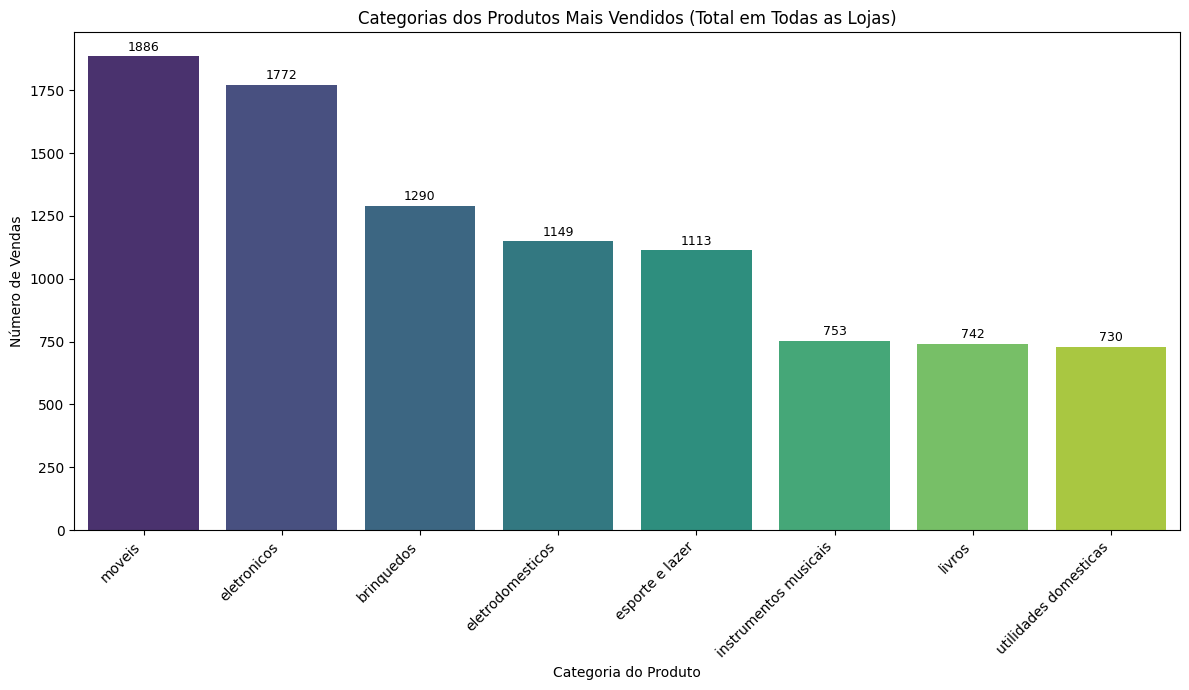

In [ ]:
import matplotlib.pyplot as plt
# Somando a contagem de vendas por categoria em todas as lojas
vendas_por_categoria_total = categoria_vendas.sum(axis=1)

# Ordenando as categorias pela contagem total de vendas (do maior para o menor)
vendas_por_categoria_total_ordenado = vendas_por_categoria_total.sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x=vendas_por_categoria_total_ordenado.index, y=vendas_por_categoria_total_ordenado.values, palette='viridis')
plt.title('Categorias dos Produtos Mais Vendidos (Total em Todas as Lojas)')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adicionando os valores no topo de cada barra
for i, count in enumerate(vendas_por_categoria_total_ordenado.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=9)

plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
# @title Calculo de Avalição Média das lojas

media_por_loja = pd.DataFrame({
    'Lojas': ['Loja 1','Loja 2','Loja 3','Loja 4'],
    'Media Avalc. Compra': [
        loja1["Avaliação da compra"].mean(),
        loja2["Avaliação da compra"].mean(),
        loja3["Avaliação da compra"].mean(),
        loja4["Avaliação da compra"].mean()
    ]
})
print("\n⭐ Avaliação média por loja (de 1 a 5):\n")
media_por_loja.sort_values(by='Media Avalc. Compra', ascending=False).round(2)


⭐ Avaliação média por loja (de 1 a 5):



,Lojas,Media Avalc. Compra
2,Loja 3,4.05
1,Loja 2,4.04
3,Loja 4,4.00
0,Loja 1,3.98


**Com base em minha analise referente as médias de avaliação podemos observar que:**
:
A loja 1 apresentou a menor avaliação dos clientes, porém ainda podemos considerar essa loja com um bom redimento. Sobre esse resultado apresentado é devido a uma logistica menos eficiente (frete médio com valor elevado ou falha em uma gestão de pós venda)

A loja 2 teve uma média de avaliação de 4,04, mostrando assim um perfil mais equilibrado em suas categorias de vendas.

A loja 3 obteve a melhor médida de avalição, onde a satisfação de seus clientes e qualidade dos produtos ofericidos a seus consumidores.

Por fim a loja 4 com uma avaliação de vendas muito inferior as demais, porém a satisfação dos clientes está em um nível superior a que vendeu mais produtos.

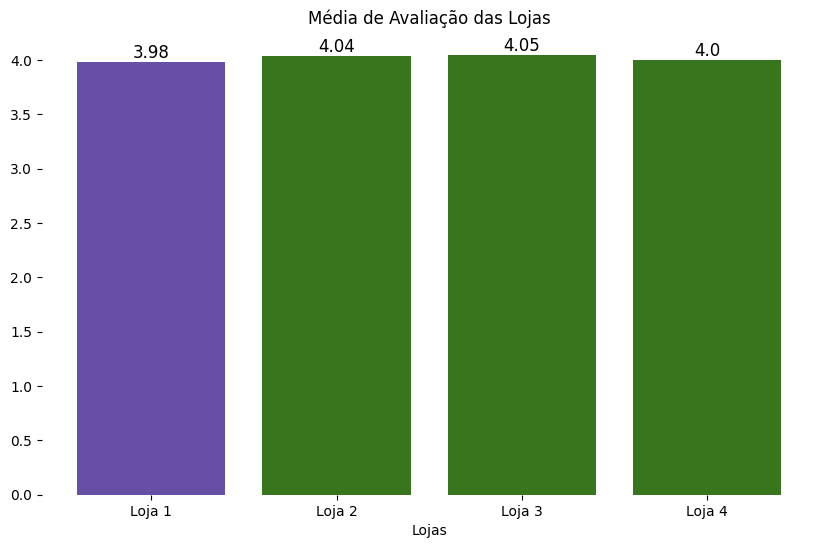

In [ ]:

from matplotlib.patches import Patch

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [3.98, 4.04, 4.05, 4.0]

pior_media = min(medias)
cores = ['#38761d' if media != pior_media else '#674ea7' for media in medias]

plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, medias, color=cores)
plt.title('Média de Avaliação das Lojas')
plt.xlabel('Lojas')

for i, media in enumerate(medias):
    plt.text(i, media, f'{media}', ha='center', va='bottom', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
produtos_loja1 = loja1.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja1 = produtos_loja1.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja2 = loja2.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja2 = produtos_loja2.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja3 = loja3.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja3 = produtos_loja3.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja4 = loja4.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja4 = produtos_loja4.sort_values(by="Quantidade Vendida", ascending=False)

print("Loja 1 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja1.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja1.tail(3).to_string(justify='left', index=False), "\n\n\n")

print("Loja 2 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja2.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja2.tail(3).to_string(justify='left', index=False), "\n\n\n")

print("Loja 3 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja3.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja3.tail(3).to_string(justify='left', index=False), "\n\n\n")

print("Loja 4 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja4.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja4.tail(3).to_string(justify='left', index=False), "\n\n\n")


Loja 1 - Produtos mais e menos vendidos:

Mais vendidos:

Produto             Quantidade Vendida
Secadora de roupas 214                
     TV Led UHD 4K 196                
            Cômoda 188                
Menos vendidos:

Produto         Quantidade Vendida
Dinossauro Rex 94                 
       Mochila 90                 
  Celular ABXY 78                  



Loja 2 - Produtos mais e menos vendidos:

Mais vendidos:

Produto                   Quantidade Vendida
Iniciando em programação 223                
        Celular Plus X42 195                
                  Violão 183                
Menos vendidos:

Produto         Quantidade Vendida
     Bicicleta 98                 
 Jogo de copos 98                 
Mesa de jantar 89                  



Loja 3 - Produtos mais e menos vendidos:

Mais vendidos:

Produto            Quantidade Vendida
        Bicicleta 191                
            Fogão 182                
Jogo de tabuleiro 181                
Menos vendidos:


In [ ]:
#Quantidade de produtos vendidos
venda_produtos = [
    loja1['Produto'].value_counts(),
    loja2['Produto'].value_counts(),
    loja3['Produto'].value_counts(),
    loja4['Produto'].value_counts()]

#Variavéis para lista de produtos mais e menos vendidos
produtos_mais_vendidos = []
produtos_menos_vendidos = []

#Extração dos produtos mais e menos vendidos por loja
for vendas in venda_produtos:
    max_vendas = vendas.max()
    min_vendas = vendas.min()
    produtos_max = vendas[vendas == max_vendas]
    produtos_min = vendas[vendas == min_vendas]
    produtos_mais_vendidos.append(produtos_max)
    produtos_menos_vendidos.append(produtos_min)

#Apresentação do resultado
for i in range(len(produtos_mais_vendidos)):
    print(f"Loja {i + 1} - Produtos mais vendidos:")
    for produto, quantidade in produtos_mais_vendidos[i].items():
        print(f" - {produto}: {quantidade} vendas")
    print()

    print(f"Loja {i + 1} - Produtos menos vendidos:")
    for produto, quantidade in produtos_menos_vendidos[i].items():
        print(f" - {produto}: {quantidade} vendas")
    print()
    if i > 2:
        continue
    print("-" * 40)
    print()

Loja 1 - Produtos mais vendidos:
 - Micro-ondas: 60 vendas
 - TV Led UHD 4K: 60 vendas
 - Guarda roupas: 60 vendas

Loja 1 - Produtos menos vendidos:
 - Headset: 33 vendas
 - Celular ABXY: 33 vendas

----------------------------------------

Loja 2 - Produtos mais vendidos:
 - Iniciando em programação: 65 vendas

Loja 2 - Produtos menos vendidos:
 - Jogo de tabuleiro: 32 vendas

----------------------------------------

Loja 3 - Produtos mais vendidos:
 - Kit banquetas: 57 vendas

Loja 3 - Produtos menos vendidos:
 - Blocos de montar: 35 vendas

----------------------------------------

Loja 4 - Produtos mais vendidos:
 - Cama box: 62 vendas

Loja 4 - Produtos menos vendidos:
 - Guitarra: 33 vendas



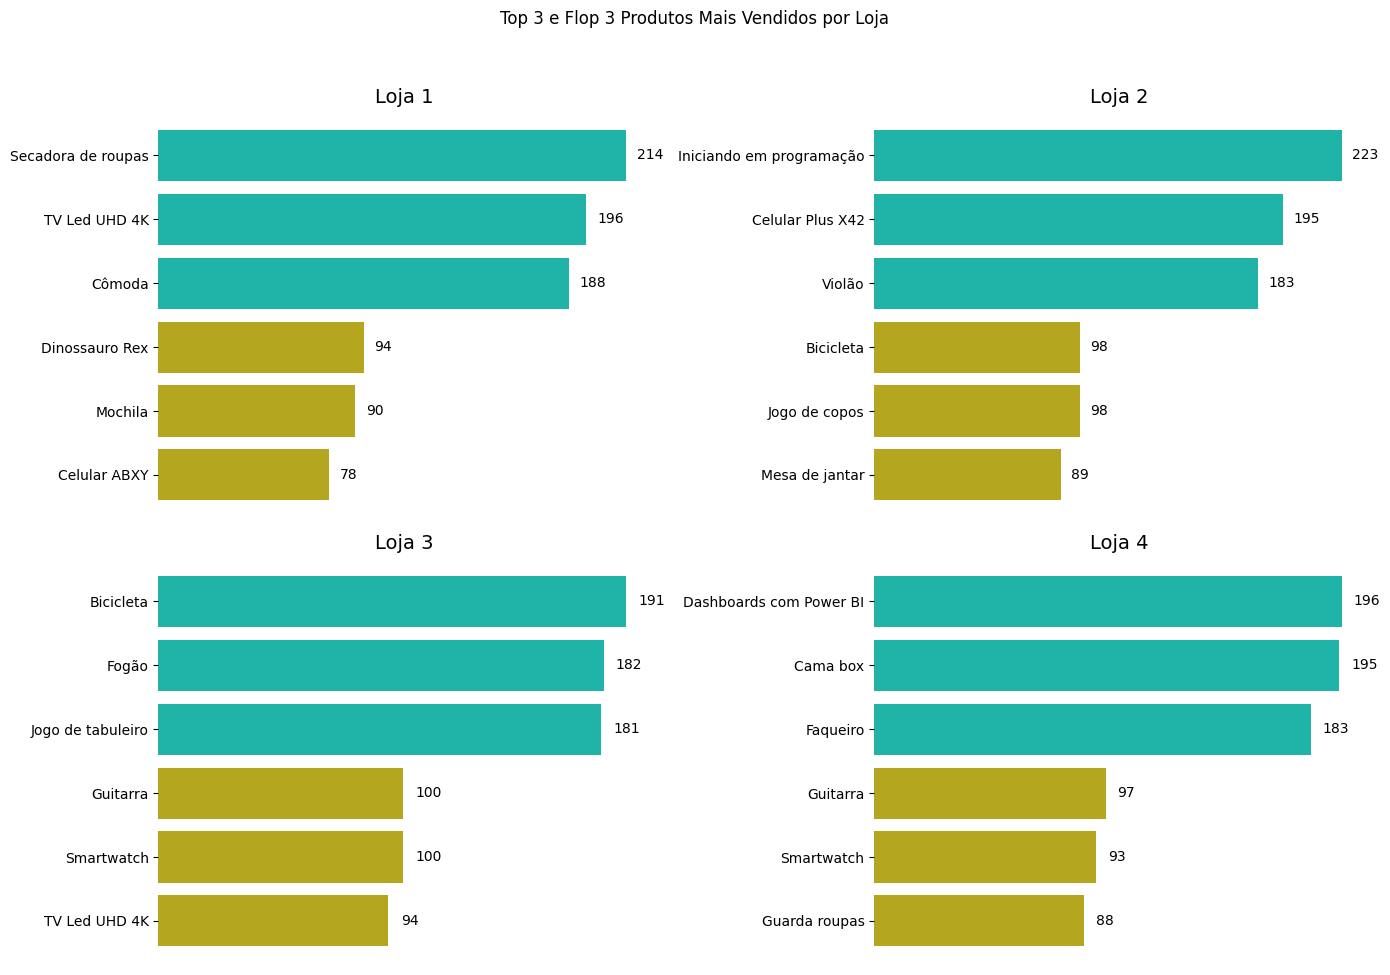

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

produtos_por_loja = {
    'Loja 1': (produtos_loja1.head(3), produtos_loja1.tail(3)),
    'Loja 2': (produtos_loja2.head(3), produtos_loja2.tail(3)),
    'Loja 3': (produtos_loja3.head(3), produtos_loja3.tail(3)),
    'Loja 4': (produtos_loja4.head(3), produtos_loja4.tail(3))
}

cores_top = '#1fb4a7'
cores_flop = '#b4a71f'

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, loja in enumerate(lojas):
    top3, flop3 = produtos_por_loja[loja]

    dados = pd.concat([top3, flop3])

    cores = [cores_top] * len(top3) + [cores_flop] * len(flop3)

    axs[i].barh(dados["Produto"], dados["Quantidade Vendida"], color=cores)
    axs[i].set_title(loja, fontsize=14)
    axs[i].invert_yaxis()
    axs[i].xaxis.set_visible(False)
    axs[i].grid(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['left'].set_visible(False)

    for j, v in enumerate(dados["Quantidade Vendida"]):
        axs[i].text(v + 5, j, str(v), va='center', fontsize=10)



fig.suptitle('Top 3 e Flop 3 Produtos Mais Vendidos por Loja')
plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.show()

# 5. Frete Médio por Loja


In [87]:
#Média do frete por loja
valor_frete = [
    round(loja1['Frete'].mean(),2),
    round(loja2['Frete'].mean(),2),
    round(loja3['Frete'].mean(),2),
    round(loja4['Frete'].mean(),2)]

media_frete = round((loja1['Frete'].sum() + loja2['Frete'].sum() + loja3['Frete'].sum() + loja4['Frete'].sum()) / (len(loja1['Frete']) + len(loja2['Frete']) + len(loja3['Frete']) + len(loja4['Frete'])),2)

#Apresentação do resultado
for i in range(len(valor_frete)):
  print(f'O frete médio da Loja {i+1} é de R$ {valor_frete[i]}')


O frete médio da Loja 1 é de R$ 34.69
O frete médio da Loja 2 é de R$ 33.62
O frete médio da Loja 3 é de R$ 33.07
O frete médio da Loja 4 é de R$ 31.28


# **Conclusão Final**

# Relatório de Vendas e Desempenho de cada Loja

---

## 1. Loja Mais Vantajosa: **Loja 1** 🏆

A **Loja 1** se destaca como a mais vantajosa entre as opções, devido aos seguintes fatores:

### Faturamento 💰:
- **Loja 1** apresenta o **maior faturamento** entre todas as lojas, com um total de **R$ 1.534.509,12**. Isso indica um alto volume de vendas e estabilidade financeira.

### Vendas por Categoria 📊:
- A **Loja 1** se destaca principalmente em **eletrônicos** (R$ 1.720.525,18) e **eletrodomésticos** (R$ 1.376.501,27), que são categorias de alto valor.
- Embora tenha um desempenho considerável nas outras categorias, ela é muito forte nas mais lucrativas.

### Avaliação Média ⭐:
- Com uma **avaliação média de 3.98**, a **Loja 1** apresenta uma boa avaliação, mostrando que os clientes estão, em geral, satisfeitos com a experiência de compra.

### Produtos Mais e Menos Vendidos 📦:
- A **Loja 1** tem produtos como a **TV Led UHD 4K** (R$ 189.534,28) e a **Geladeira** (R$ 149.524,28) entre os itens que mais geraram receita.
- Apesar de ter produtos que geraram menos receita, como o **Cubo Mágico 8x8** (R$ 929,27), esses representam uma minoria em comparação aos produtos mais lucrativos.

### Frete Médio 🚚:
- O custo de **frete médio** na **Loja 1** é de **R$ 34.69**, que é razoável, mas a alta receita gerada compensa esse custo.

### Conclusão 🎯:
A **Loja 1** é a mais vantajosa devido ao seu alto **faturamento**, bom desempenho em categorias de alto valor, boa **avaliação média** e produtos com **grande receita gerada**. É uma loja com bom potencial de crescimento e estabilidade.

---

## 2. Loja Menos Vantajosa: **Loja 4** ❌

A **Loja 4**, apesar de ter alguns pontos positivos, é a **menos vantajosa** por diversos motivos:

### Faturamento 💸:
- A **Loja 4** tem o **menor faturamento** entre as lojas analisadas, com um total de **R$ 1.384.497,58**, o que indica um desempenho mais fraco em relação às outras lojas.

### Vendas por Categoria 📉:
- Embora a **Loja 4** tenha boas vendas em **eletrônicos** (R$ 1.615.256,00) e **eletrodomésticos** (R$ 1.172.119,35), o volume geral de vendas é o menor, o que limita seu crescimento.

### Avaliação Média ⭐:
- A **Loja 4** tem uma **avaliação média de 4.00**, que é boa, mas não se destaca tanto quanto as outras lojas (a **Loja 3**, por exemplo, tem a avaliação mais alta com 4.05).

### Produtos Mais e Menos Vendidos 📦:
- Os produtos da **Loja 4**, como **Corda de Pular** (R$ 939,74) e **Cubo Mágico 8x8** (R$ 997,38), são os que menos geraram receita, o que pode indicar que a loja possui produtos com menor atratividade ou valor agregado.

### Frete Médio 🚚:
- O custo de **frete médio** da **Loja 4** é o mais baixo, **R$ 31.28**, o que pode ser positivo em termos de custo-benefício. No entanto, esse valor não compensa as baixas vendas e o faturamento reduzido.

### Conclusão 🚫:
A **Loja 4** é a **menos vantajosa** devido ao **menor faturamento**, desempenho abaixo nas vendas totais, e a **avaliação média** que, embora boa, não é a melhor entre as lojas. Além disso, ela tem uma **menor receita de produtos**, o que pode indicar dificuldades em atrair consumidores para suas ofertas.

---

## 3. Loja que o Sr. João deve se desfazer: **Loja 4** ❌

De acordo com a análise do desempenho das lojas, o Sr. João deve considerar a venda da **Loja 4**, pelos seguintes motivos:

### Faturamento e Desempenho Global 💸:
- A **Loja 4** tem o menor faturamento entre as lojas analisadas e não apresenta um desempenho suficiente para competir com as demais.

### Produtos com Menor Receita 📉:
- Os produtos da **Loja 4** geraram menos receita, o que indica um portfólio menos atrativo.

### Baixa Rentabilidade ⚠️:
- Apesar do custo de frete ser o mais baixo, o desempenho fraco nas vendas e o faturamento limitado fazem com que a loja seja uma opção menos rentável.

### Conclusão 🎯:
A **Loja 4** é a menos vantajosa para o Sr. João, que deve considerar se desfazer dela para focar em lojas com melhor performance.

---

## Conclusão Final 📝

- **Loja Mais Vantajosa**: **Loja 1** 🏅 (Maior faturamento, bom desempenho nas categorias de alto valor, boa avaliação média e produtos com alta receita).
- **Loja Menos Vantajosa**: **Loja 4** ❌ (Menor faturamento, desempenho abaixo nas vendas gerais, avaliação média razoável e produtos com baixa receita).
- **Loja a ser Vendida pelo Sr. João**: **Loja 4** ❌ (Devido ao menor faturamento, baixo desempenho e falta de rentabilidade).